In [2]:
import pandas as pd
df = pd.read_csv("hies_state.csv")
df.head()
df.describe()

,income_mean,income_median,expenditure_mean,gini,poverty,spending_rate,saving_rate
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,7479.857143,5888.785714,4772.071429,0.362508,6.771429,64.835714,35.164286
std,2505.774711,2001.845617,1309.361528,0.023966,5.074738,5.752405,5.752405
min,4885.000000,3614.000000,3342.000000,0.307700,1.400000,54.200000,28.200000
25%,5777.500000,4611.000000,3851.250000,0.359842,4.050000,61.125000,31.375000
50%,6622.500000,5102.000000,4392.500000,0.368110,5.400000,66.850000,33.150000
75%,8214.500000,6429.000000,5337.000000,0.377345,8.625000,68.625000,38.875000
max,13325.000000,10234.000000,7823.000000,0.394910,19.700000,71.800000,45.800000


In [7]:
df['spending_rate'] = (df['expenditure_mean']/df['income_mean']*100).round(1)
df['saving_rate'] = (100 - df['spending_rate']).round(1)
df.head()

,date,state,income_mean,income_median,expenditure_mean,gini,poverty,spending_rate,saving_rate
0,2022-01-01,Johor,8517,6879,5342,0.36646,4.6,62.7,37.3
1,2022-01-01,Kedah,5550,4402,3765,0.35938,9.0,67.8,32.2
2,2022-01-01,Kelantan,4885,3614,3505,0.38540,13.2,71.8,28.2
3,2022-01-01,Melaka,8057,6210,5707,0.36963,4.2,70.8,29.2
4,2022-01-01,Negeri Sembilan,6788,5226,4678,0.36853,4.4,68.9,31.1


In [8]:
df.to_csv('hies_state.csv', index=False)

In [3]:
a = 13325/7480
a

1.7814171122994653

In [6]:
df3 = pd.DataFrame({
    "state": ['Kuala Lumpur', 'All States'],
    "income_mean": [13325, 7480]
})
df3.head()

,state,income_mean
0,Kuala Lumpur,13325
1,All States,7480


In [7]:
df3.to_csv('comparison_state.csv', index=False)

Matplotlib is building the font cache; this may take a moment.


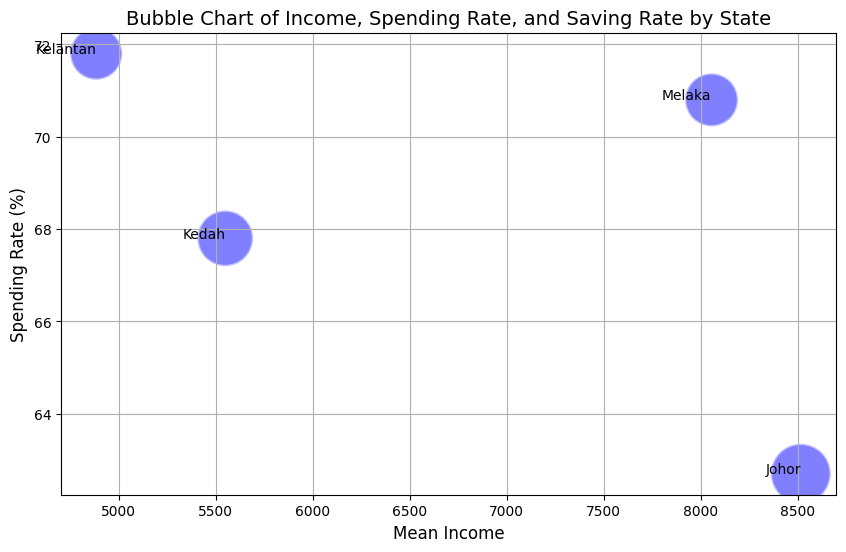

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the provided data
data = {
    'date': ['2022-01-01'] * 4,
    'state': ['Johor', 'Kedah', 'Kelantan', 'Melaka'],
    'income_mean': [8517, 5550, 4885, 8057],
    'expenditure_mean': [5342, 3765, 3505, 5707],
    'gini': [0.36646, 0.35938, 0.3854, 0.36963],
    'poverty': [4.6, 9.0, 13.2, 4.2],
    'spending_rate': [62.7, 67.8, 71.8, 70.8],
    'saving_rate': [37.3, 32.2, 28.2, 29.2]
}

df = pd.DataFrame(data)

# Create a bubble chart
plt.figure(figsize=(10, 6))

# Scale the size of bubbles
bubble_size = df['saving_rate'] * 50  # Adjust the multiplier for better visualization

# Scatter plot
plt.scatter(df['income_mean'], df['spending_rate'], s=bubble_size, alpha=0.5, c='blue', edgecolors='w', linewidth=2)

# Add annotations for each state
for i in range(len(df)):
    plt.annotate(df['state'][i], (df['income_mean'][i], df['spending_rate'][i]), fontsize=10, ha='right')

# Add labels and title
plt.title('Bubble Chart of Income, Spending Rate, and Saving Rate by State', fontsize=14)
plt.xlabel('Mean Income', fontsize=12)
plt.ylabel('Spending Rate (%)', fontsize=12)
plt.grid(True)

# Show the plot
plt.show()
